In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import seaborn as sns

from itertools import product

In [ ]:
df = pd.read_pickle('./j1c-features.pkl', compression='gzip')

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.floating):
        df[col] = df[col].astype(np.float32)

df = df.drop('diameter', 1)
df = df.drop('degree_assortativity', 1)
df = df.dropna()

In [ ]:
df = pd.read_pickle('./data/j1c-features-cleaned.pkl', compression='gzip')

In [ ]:
graphs = nx.read_graph6('./data/graph10.g6')

In [ ]:
ORDERING = dict(
    # num_edges = "# Edges",
    density="Density",
    # total_triangles = '# Triangles',
    triangle_ratio="Triangle Ratio",
    # is_planar="Is Planar Graph?",
    avg_shortest_path_length="Avg Shortest Path",
    global_clustering_coefficient="Global Clustering",
    avg_clustering_coefficient="Avg Clustering",
    square_clustering="Square Clustering",
    global_efficiency="Global Efficiency",
    local_efficiency="Local Efficiency",
    # degree_assortativity = "Degree Assortativity",
    # diameter = 'Diameter',
    node_connectivity="Node Connectivity",
    modularity="Modularity",
)

def hexbin(
    df,
    ordering,
    x_col="modularity",
    gridsize=40,
    cmap="Blues",
    bins="log",
    title=None,
    savefig=None,
):
    xlabel = ordering[x_col]
    ordering = {key:val for key, val in ordering.items() if key != x_col}

    ncols = 3
    nrows = int(np.ceil(len(ordering) / ncols))
    figsize = (4*nrows, 3*ncols)

    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize, sharex=True)
    ax = ax.ravel()

    for idx, (col, y_label) in enumerate(ordering.items()):
        ax[idx].hexbin(
            x=df[x_col], y=df[col], cmap=cmap, gridsize=gridsize, bins=bins
        )
        sns.despine(ax=ax[idx])
        # ax[idx].set_xlabel('Modularity', fontsize=20)
        ax[idx].set_ylabel(y_label, fontsize=20)

    for i in range(1, 4):
        ax[-i].set_xlabel(xlabel, fontsize=20)

    if len(ordering) != (ncols * nrows):
        for i in range(1, len(ax) - len(ordering) + 1):
            fig.delaxes(ax[-i])

    fig.tight_layout()
    
    if title is not None:
        fig.suptitle(title, y=1.02, fontsize=30)

    if savefig is not None:
        fig.savefig(f"{savefig}.png", dpi=300, bbox_inches='tight')
    
    plt.close()


In [ ]:
hexbin(df, ORDERING)

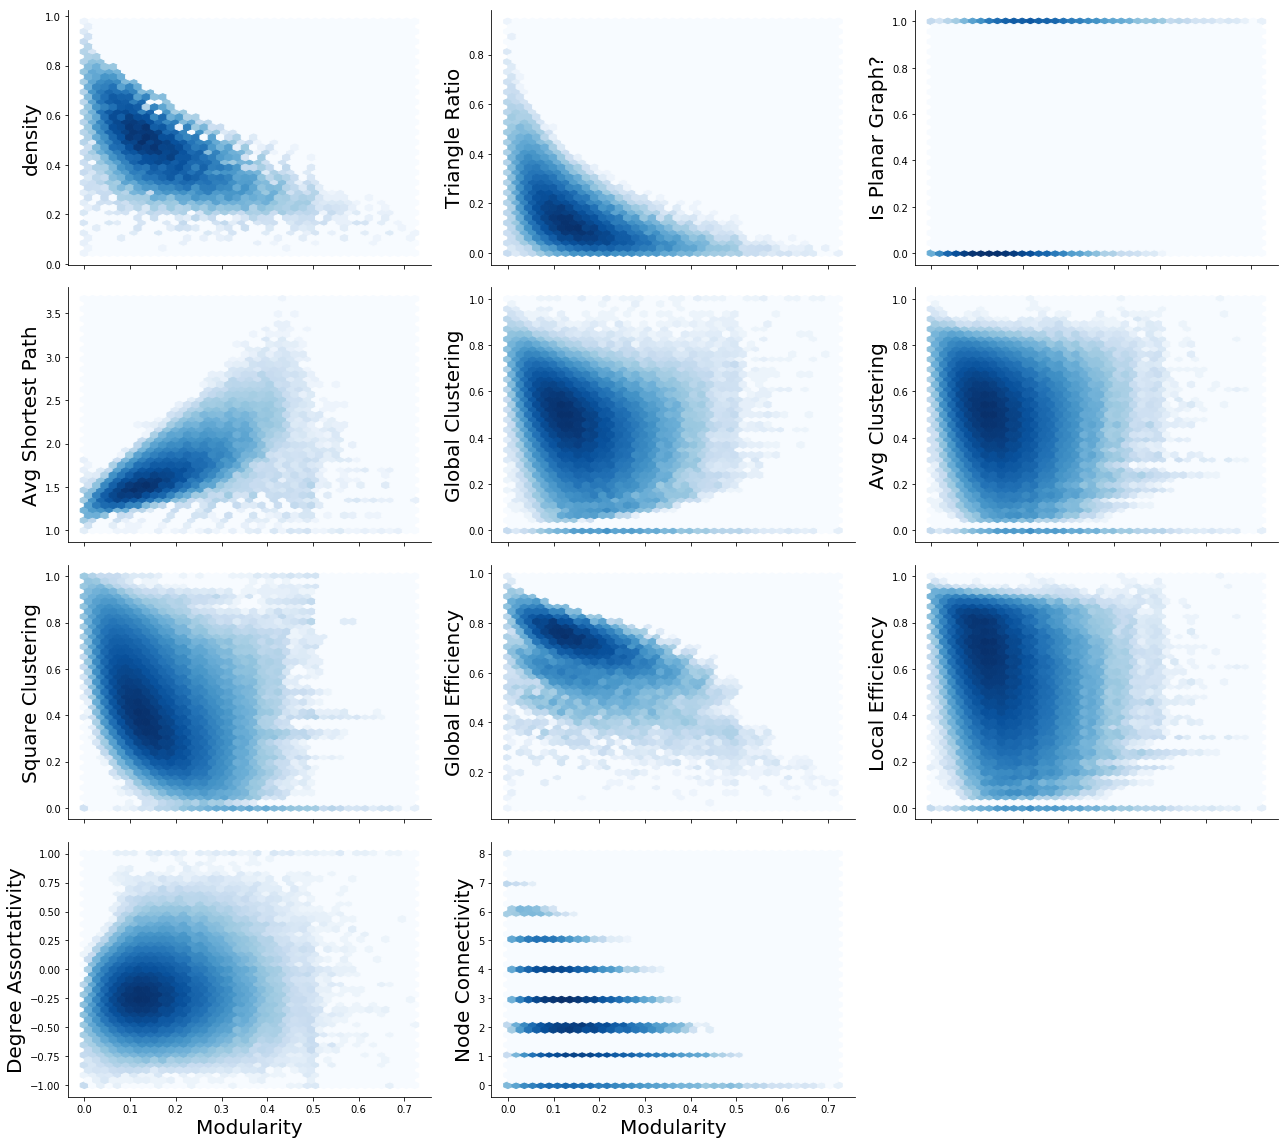

In [60]:
gridsize=40
cmap = 'Blues'
bins='log'

fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(18, 16), sharex=True)
ax = ax.ravel()

for idx, (col, y_label) in enumerate(ordering.items()):
    ax[idx].hexbin(x=df.modularity, y=df[col], cmap=cmap, gridsize=gridsize, bins=bins)
    sns.despine(ax=ax[idx])
    #ax[idx].set_xlabel('Modularity', fontsize=20)
    ax[idx].set_ylabel(y_label, fontsize=20)

#ax[-4].set_xlabel('Modularity', fontsize=20)
ax[-2].set_xlabel('Modularity', fontsize=20)
ax[-3].set_xlabel("Modularity", fontsize=20)
fig.delaxes(ax[-1])
fig.tight_layout()

In [61]:
fig.savefig('exp6.png', dpi=300)

In [341]:
graphs_array = np.array(graphs_vec)[df.index]

In [393]:
np.random.seed(1)

df_ = df.reset_index(drop=True)

for num_edge in np.unique(df.num_edges):
    tmp = df_[df_.num_edges == num_edge]
    
    random_idx = np.random.choice(tmp.index)
    norms = np.linalg.norm(graphs_array - graphs_array[random_idx], axis=1)
    
    mask = np.arange(1, graphs_array.shape[0]+1)[norms <= 3]
    tmp = df.loc[mask]

    hexbin(
        tmp, 
        ORDERING, 
        title=f"Base Graph Edges={num_edge}, Threshold=3, n={tmp.shape[0]}", 
        savefig=f"./j1c/j1c_hexbin_{num_edge:02d}_base"
    )